In [4]:
import mne
from mne.datasets import sample
from mne import read_evokeds
import numpy as np
import os.path as op
import matplotlib.pyplot as plt
%matplotlib qt 
from scipy import stats
import seaborn as sns
from scipy.stats import sem
import matplotlib.style as style
import os
import pandas as pd
#交互式绘图
#from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from mne.time_frequency import psd_array_welch
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet, AverageTFR)

from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,corrmap)

#import pingouin as pg
# 01定位通道位置---02删除无用通道---03滤波---04分段---05基线校正---06重参考07---降低采样率---08插值坏导---09独立主成分分析---10剔除坏段

In [ ]:
#使用Python的os库遍历每个文件夹，读取其中的EDF文件，并存储在一个列表。
# Proc_folder = 'D:/Py-code_EEG/724脑电剔除被试' 
# fif_files = []
# for folder in [Proc_folder]:
#     files = os.listdir(folder)
#     fif_files.extend([os.path.join(folder, file) for file in files if file.endswith('.fif')])

# #创建一个Raw对象，将所有EDF文件叠加在一起，然后进行分析。
# raw_list = [mne.io.read_raw_fif(fif_file, preload=True) for fif_file in fif_files]

# raw_combined = mne.concatenate_raws(raw_list)
# raw_combined.plot()
raw_combined.save('D:/Py-code_EEG/724脑电剔除被试/724剔除后被试.fif')

In [ ]:
raw_combined.save('D:/Py-code_EEG/724脑电剔除被试/724剔除后被试.fif')

In [6]:
'''合并数据代码'''
import mne
import os
from glob import glob

# 定义包含目标关键词的文件名模式
keyword = ''
file_pattern = f'*{keyword}*.fif'

# 搜索包含关键词的FIF文件
fif_files = glob(os.path.join('../724脑电剔除被试', file_pattern))

# 读取并合并FIF文件
raw = mne.io.read_raw_fif(fif_files[0], preload=True)
for fif_file in fif_files[1:]:
    raw_tmp = mne.io.read_raw_fif(fif_file, preload=True)
    raw.append(raw_tmp)
raw.plot()
# 保存合并后的数据
#raw.save('./CQdata/2024-5-10/20240528-data/Processed_赵嘉乐.fif')


Opening raw data file ../724脑电剔除被试\624_ICA结果数据.fif...


C:\Users\许愿\AppData\Local\Temp\ipykernel_17232\1247438368.py:14: RuntimeWarning: This filename (../724脑电剔除被试\624_ICA结果数据.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_files[0], preload=True)


    Range : 0 ... 16980130 =      0.000 ... 33960.260 secs
Ready.
Reading 0 ... 16980130  =      0.000 ... 33960.260 secs...
Opening raw data file ../724脑电剔除被试\724剔除后被试-预处理完成-ICA结果.fif...


C:\Users\许愿\AppData\Local\Temp\ipykernel_17232\1247438368.py:16: RuntimeWarning: This filename (../724脑电剔除被试\724剔除后被试-预处理完成-ICA结果.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_tmp = mne.io.read_raw_fif(fif_file, preload=True)


    Range : 0 ... 16330125 =      0.000 ... 32660.250 secs
Ready.
Reading 0 ... 16330125  =      0.000 ... 32660.250 secs...
Opening raw data file ../724脑电剔除被试\724剔除后被试-预处理完成.fif...


C:\Users\许愿\AppData\Local\Temp\ipykernel_17232\1247438368.py:16: RuntimeWarning: This filename (../724脑电剔除被试\724剔除后被试-预处理完成.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_tmp = mne.io.read_raw_fif(fif_file, preload=True)


KeyboardInterrupt: 

In [3]:
                              """ 第二步：从所有的事件里读取想要的事件 （Events） """
raw = raw_combined
(events, event_id) = mne.events_from_annotations(raw)  # 将annotation类型的事件转换为events类型
event_dict = {'Grey':0,'L1': 1,'L2': 2,'L3': 3,'L4': 4,'L5': 5}
event_id =  event_dict
event_id
#'Grey':0,'Open':6,'Close':7,'break':9

NameError: name 'raw_combined' is not defined

In [4]:
                             """  第三步：电极点定位 （Digitized points） """
# 一般采用10_20_standard_montage
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, match_case=False)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,24 points
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [5]:
"""滤波"""
raw = raw_combined
"""低通滤波去除电源线噪声"""
raw.filter(None, 30., fir_design='firwin')
raw.plot()#_psd(area_mode='range', tmax=10.0, average=False)
"""高通滤波消除缓慢漂移"""
raw.filter(0.1, None, fir_design='firwin')
raw.plot(start=0, duration=20)#_psd(area_mode='range', tmax=10.0, average=False)
"""数据 预处理 设置 重参考"""
raw.set_eeg_reference(ref_channels=['A1','A2']) # 使用平均参考,不报错
raw.plot()

Filtering raw data in 131 contiguous segments
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 131 contiguous segments
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Channels marked as bad:
none
Channels marked as bad:
none


In [9]:
#raw.save('./CQdata/623_全被试预处理合并数据.fif', overwrite=True)

Writing D:\Py-code_EEG\1_EEG_Code\CQdata\623_全被试预处理合并数据.fif


C:\Users\许愿\AppData\Local\Temp\ipykernel_20892\696790050.py:1: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\623_全被试预处理合并数据.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save('./CQdata/623_全被试预处理合并数据.fif', overwrite=True)


Closing D:\Py-code_EEG\1_EEG_Code\CQdata\623_全被试预处理合并数据.fif
[done]
Channels marked as bad:
none


In [25]:
"""  第四步：不同时间的     epochs  """
(events,event_id) = mne.events_from_annotations(raw, event_id=event_id)
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=0.001,event_repeated ='merge',baseline=(None, 0), preload=True)
epochs.plot()

Used Annotations descriptions: ['Grey', 'L1', 'L2', 'L3', 'L4', 'L5']
Not setting metadata
8134 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8134 events and 1551 original time points ...
53 bad epochs dropped


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [21]:
"""                                                01数据处理各个窗内的事件的各频率功率计算                             """

"""  第四步：不同时间的     epochs  """
(events,event_id) = mne.events_from_annotations(raw, event_id=event_id)
epochs = mne.Epochs(raw, events, event_id, tmin=-0.5, tmax=0.1,event_repeated ='merge',baseline=(None, 0), preload=True)
epochs.plot()

# 定义感兴趣的通道和频段范围
channels_of_interest = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
bands = {
    'theta': (4, 8),
    'alpha1': (8, 10),
    'alpha2': (10, 13),
    'beta1': (13, 18),
    'beta2': (18, 30)
}

# 修改 compute_band_power 函数以计算每个 epoch 的功率
def compute_band_power(data, sfreq, bands):
    band_powers = {band: [] for band in bands.keys()}
    
    for band, (fmin, fmax) in bands.items():
        psds, freqs = psd_array_welch(data, sfreq, fmin=fmin, fmax=fmax, n_fft=256, n_overlap=128)
        psds_mean = np.mean(psds, axis=1)  # 平均所有通道的功率值
        band_powers[band] = psds_mean  # 保留所有 epoch 的功率值
    
    return band_powers

# 计算每个事件在各频段上的平均功率
event_ids = ['Grey','L1', 'L2', 'L3', 'L4', 'L5']
band_powers_all = {event: {} for event in event_ids}

for event in event_ids:
    epochs_event = epochs[event].copy().pick_channels(channels_of_interest)
    data = epochs_event.get_data()
    sfreq = epochs_event.info['sfreq']
    # 将所有通道叠加
    data_combined = np.sum(data, axis=1)
    band_powers_all[event] = compute_band_power(data_combined, sfreq, bands)

# 创建一个列表，用于存储每个 epoch 的不同频段的功率值
results = []

for event, band_powers in band_powers_all.items():
    for band, powers in band_powers.items():
        for epoch_idx, power in enumerate(powers):
            results.append({'Event': event, 'Epoch': epoch_idx, 'Frequency Band': band, 'Power': power})

# 将结果存储到 DataFrame 中
df = pd.DataFrame(results)
df
# # export to CSV
#df.to_csv('./CQdata/2024-5-10/20240528-data/619基线.csv', index=False)
#我需要读取当前文件夹下的所有csv文件，新建一列name，值为之前所在的文件夹名，然后合并为一个文件夹，

Used Annotations descriptions: ['Grey', 'L1', 'L2', 'L3', 'L4', 'L5']
Not setting metadata
7834 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7834 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\许愿\AppData\Local\Temp\ipykernel_19852\3709373919.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\许愿\AppData\Local\Temp\ipykernel_19852\3709373919.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_19852\3709373919.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\许愿\AppData\Local\Temp\ipykernel_19852\3709373919.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_19852\3709373919.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\许愿\AppData\Local\Temp\ipykernel_19852\3709373919.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()


,Event,Epoch,Frequency Band,Power
0,Grey,0,theta,2.664948e-10
1,Grey,1,theta,1.083936e-08
2,Grey,2,theta,1.803077e-09
3,Grey,3,theta,2.550661e-09
4,Grey,4,theta,3.475841e-11
...,...,...,...,...
39165,L5,778,beta2,2.965706e-10
39166,L5,779,beta2,3.049687e-11
39167,L5,780,beta2,3.077228e-11
39168,L5,781,beta2,4.579706e-11


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [22]:
# # export to CSV
df.to_csv('./CQdata/2024-5-10/20240528-data/619基线.csv', index=False)

In [13]:
                          """  第四步：Creat epochs  """

(events,event_id) = mne.events_from_annotations(raw, event_id=event_id)
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,event_repeated = 'merge',baseline=(None, 0), preload=True)
epochs.plot()

Used Annotations descriptions: ['Grey', 'L1', 'L2', 'L3', 'L4', 'L5']
Not setting metadata
360 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 360 events and 551 original time points ...
0 bad epochs dropped


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [ ]:
"""  给原始数据————添加事件  """
sfreq = 500
events = np.array([
    [int(0 * sfreq), 0, 6],
    [int(15 * sfreq), 0, 7],  # [睁闭眼时间]
    
    [int(30 * sfreq), 0, 1],
    [int(33* sfreq), 0, 0],
    [int(36 * sfreq), 0, 2],
    [int(39 * sfreq), 0, 0],
    [int(42 * sfreq), 0, 3],  # [Group1——L1_L5]
    [int(45 * sfreq), 0, 0],
    [int(48 * sfreq), 0, 4],
    [int(51 * sfreq), 0, 0],  
    [int(54 * sfreq), 0, 5],
    [int(57 * sfreq), 0, 0], 
    [int(60 * sfreq), 0, 9],
      
    [int(70 * sfreq), 0, 1], 
    [int(73* sfreq), 0, 0],
    [int(76 * sfreq), 0, 2],
    [int(79 * sfreq), 0, 0],
    [int(82 * sfreq), 0, 3],  # [Group2——L1_L5]
    [int(85 * sfreq), 0, 0],
    [int(88 * sfreq), 0, 4],
    [int(91 * sfreq), 0, 0],  
    [int(94 * sfreq), 0, 5],
    [int(97 * sfreq), 0, 0],  
    [int(100 * sfreq), 0, 9],
     
    [int(110 * sfreq), 0, 1],
    [int(113* sfreq), 0, 0],
    [int(116 * sfreq), 0, 2],
    [int(119 * sfreq), 0, 0],
    [int(122 * sfreq), 0, 3],  # [Group3——L1_L5]
    [int(125 * sfreq), 0, 0],
    [int(128 * sfreq), 0, 4],
    [int(131 * sfreq), 0, 0],  
    [int(134 * sfreq), 0, 5],
    [int(137 * sfreq), 0, 0], 
    [int(140 * sfreq), 0, 9],
     
    [int(150 * sfreq), 0, 1],
    [int(153* sfreq), 0, 0],
    [int(156 * sfreq), 0, 2],
    [int(159 * sfreq), 0, 0],
    [int(162 * sfreq), 0, 3],  # [Group4——L1_L5]
    [int(165 * sfreq), 0, 0],
    [int(168 * sfreq), 0, 4],
    [int(171 * sfreq), 0, 0],  
    [int(174 * sfreq), 0, 5],
    [int(177 * sfreq), 0, 0],  
    [int(180 * sfreq), 0, 9],
    
    [int(190 * sfreq), 0, 1],
    [int(193* sfreq), 0, 0],
    [int(196 * sfreq), 0, 2],
    [int(199 * sfreq), 0, 0],
    [int(202 * sfreq), 0, 3],  # [Group5——L1_L5]
    [int(205 * sfreq), 0, 0],
    [int(208 * sfreq), 0, 4],
    [int(211 * sfreq), 0, 0],  
    [int(214 * sfreq), 0, 5],
    [int(217 * sfreq), 0, 0],  
    [int(220 * sfreq), 0, 9],
    
    [int(230 * sfreq), 0, 1],
    [int(233* sfreq), 0, 0],
    [int(236 * sfreq), 0, 2],
    [int(239 * sfreq), 0, 0],
    [int(242 * sfreq), 0, 3],  # [Group6——L1_L5]
    [int(245 * sfreq), 0, 0],
    [int(248 * sfreq), 0, 4],
    [int(251 * sfreq), 0, 0],  
    [int(254 * sfreq), 0, 5],
    [int(257 * sfreq), 0, 0],  
    [int(260 * sfreq), 0, 9],

])
onsets = events[:, 0] / raw.info['sfreq']
#event_descriptions = ['T0', 'T1', 'T2']

#mapping = {1: 'Event_1', 2: 'Event_2'}
# # 创建事件对象
#event_id = {'Event_1': 1, 'Event_2': 2}  # 事件标记映射到整数值
# 设置事件开始前时间为-0.1s , tmin:event开始前的时间，如果未指定，则默认为0

"""mapping durations events"""
#mapping = {1: 'Event_1', 2: 'Event_2'}
mapping ={1: 'L1', 2: 'L2', 3: 'L3', 4: 'L4', 5: 'L5', 0: 'Grey', 6: 'Open', 7: 'Close' ,9: 'break'}
durations = np.zeros_like(onsets)  # assumes instantaneous events 假设事件是瞬时的

descriptions = [mapping[event_id] for event_id in events[:, 2]]

events_Annotation  = mne.Annotations(onset=onsets,  # 将事件时间点转换为秒
                         duration=durations ,  # 事件持续时间duration=[0.7, 0.7,0.7, 0.7,0.7],
                         description=descriptions) # 事件标记描述
raw.set_annotations(events_Annotation)
raw.plot()

In [24]:
###5.绘制事件图
fig=mne.viz.plot_events(events,sfreq=raw.info['sfreq'],
                       first_samp=raw.first_samp,event_id=event_id)
#subplots_adjust(right=0.7)

In [ ]:
# 独立成分分析 ICA
# 运行ICA
ica = ICA(max_iter='auto')#表示算法将自动选择最适合的迭代次数来拟合数据。这意味着算法将根据数据的复杂性自动调整迭代次数，以在不引入过度拟合的情况下找到最佳解。
raw_for_ica = raw.copy()
ica.fit(raw_for_ica) 

ica.plot_sources(raw_for_ica) # 绘制各成分的时序信号图
ica.plot_components() # 绘制各成分地形图


In [ ]:
""" 查看去掉   某一成分前后    信号差异"""
ica.plot_overlay(raw_for_ica, exclude=[4,12,17])

In [ ]:
"""单独可视化某个需要查看多项属性的成分"""
ica.plot_properties(raw_for_ica, picks=[0,1,2,6,7,10])

In [ ]:
# 剔除成分
ica.exclude = [0,1,2,4,5] # 设定要剔除的成分序号
ica.apply(raw) # 应用到脑电数据上

"""绘制ICA后的数据波形图"""
raw.plot(duration=5, n_channels=19, clipping=None)

In [ ]:
raw.plot_psd(fmax=60)
plt.show()

In [ ]:
                 '''                     SCI 01 ：       制图并导出数据                         '''
# 定义频段范围，包括δ和θ频段
channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

theta_band = (4, 8)
alpha1_band = (8, 9.9)
alpha2_band = (10, 12.9)
beta1_band = (13, 17.9)
beta2_band = (18, 30)
bands = {'theta': theta_band, 'alpha1': alpha1_band, 'alpha2': alpha2_band, 'beta1': beta1_band, 'beta2': beta2_band}

# 修改 compute_band_power 函数以包括δ和θ频段的计算
def compute_band_power(data, sfreq, bands):
    band_powers = {band: [] for band in bands.keys()}
    
    for band, (fmin, fmax) in bands.items():
        psds, freqs = psd_array_welch(data, sfreq, fmin=fmin, fmax=fmax, n_fft=256, n_overlap=128)
        psds_mean = np.mean(psds, axis=2)  # 平均所有频率点的功率值
        band_powers[band] = np.mean(psds_mean, axis=0)  # 平均所有epochs的功率值
    
    return band_powers

# 计算每个事件在各频段上的平均功率
event_ids = ['L1', 'L2', 'L3', 'L4', 'L5']
band_powers_all = {event: {} for event in event_ids}

for event in event_ids:
    epochs_event = epochs[event].copy().pick_channels(channels_of_interest)
    data = epochs_event.get_data()
    sfreq = epochs_event.info['sfreq']
    band_powers_all[event] = compute_band_power(data, sfreq, bands)

# 创建一个列表，用于存储每个事件在各频段上的平均功率值
results = []

for event, band_powers in band_powers_all.items():
    for band, powers in band_powers.items():
        avg_power = np.mean(powers)
        results.append({'Event': event, 'Frequency Band': band, 'Average Power': avg_power})

# 将结果存储到DataFrame中
df = pd.DataFrame(results)
df
# 将DataFrame保存为CSV文件
#df.to_csv('./CQdata/2024-5-10/陈沿鑫/521_陈沿鑫.csv', index=False)

# 可视化结果
# plt.figure(figsize=(12, 8))
# bar_width = 0.15
# index = np.arange(len(bands))

# # 调整颜色
# colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD', '#B8D85A']

# for i, event in enumerate(event_ids):
#     powers = [np.mean(band_powers_all[event][band]) for band in bands.keys()]
#     errors = [sem(band_powers_all[event][band]) for band in bands.keys()]
#     plt.bar(index + i * bar_width, powers, bar_width, label=event, color=colors[i], yerr=errors, capsize=5)

# plt.xlabel('Frequency Bands')
# plt.ylabel('Average Power')
# plt.title('Average Power in Different Frequency Bands for Each Event')
# plt.xticks(index + bar_width * 3, bands.keys())  # 由于现在有7个频段，因此需要调整刻度位置
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()

# # 设置保存图像
# #plt.savefig('./CQdata/2024-5-10/DA005162_胡宇/events/DA005162_胡宇average_band_powers.png', dpi=300, bbox_inches='tight')

# plt.show()


In [9]:
"""  PSD在各频段的功率制图 """
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# 定义频段和相应的颜色
frequency_bands = {
   # 'theta': (4, 8),
    'alpha1': (8, 9.9),
    'alpha2': (10, 12.9),
    'beta1': (13, 17.9),
    'beta2': (18, 30)
}

# 设置不同事件对应的颜色
color_events = {'L1': 'red', 'L2': 'green', 'L3': 'blue', 'L4': 'yellow', 'L5': 'orange'}

# 计算每个事件在不同频率区间的 PSD 并绘制能量分布图
def EpochPSDEnergy(epochs):
    for event in epochs.event_id:
        # 获取每个事件的数据
        epoch_data = epochs[event].get_data()
        eventEnergy = []
        # 遍历每个频段
        for band_name, (fmin, fmax) in frequency_bands.items():
            # 初始化 PSD 列表
            psd_values = []
            # 计算每个频段的 PSD
            for data in epoch_data:
                freqs, psd = welch(data[0], fs=epochs.info['sfreq'], nperseg=256)
                idx_band = np.where((freqs >= fmin) & (freqs < fmax))
                psd_band = np.mean(psd[idx_band])
                psd_values.append(psd_band)
            # 计算 PSD 的平均值作为事件在该频段上的能量
            eventEnergy.append(np.mean(psd_values))
        # 绘制不同事件、不同频率区间的能量值
        plt.plot(list(frequency_bands.keys()), eventEnergy, color=color_events[event], label=event, marker='o', lw=0, ms=5)
    
    # 设置标题
    plt.title('PSD_SUM')
    # 设置图例
    plt.legend()
    # 显示图形
    plt.show()

# 调用函数进行计算和绘图
EpochPSDEnergy(epochs)


C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\3118791506.py:22: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epoch_data = epochs[event].get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\3118791506.py:22: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epoch_data = epochs[event].get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\3118791506.py:22: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epoch_data = epochs[event].get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\3118791506.py:22: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epoch_data = epochs[event].get_data()
C:\Users\许愿\AppData\Local\Temp\i

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


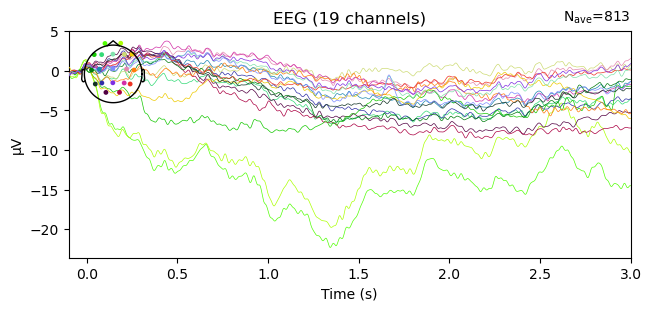

In [26]:
"""                                           06 结果出图 —— 创建刺激事件对象——传递数据——用于分析ERP波形          """
# 选择感兴趣的通道
channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
#channels_of_interest =[  'O1', 'O2']
evoked_L1 = epochs['L1'].copy().pick_channels(channels_of_interest).average()
evoked_L2 = epochs['L2'].copy().pick_channels(channels_of_interest).average()
evoked_L3 = epochs['L3'].copy().pick_channels(channels_of_interest).average()
evoked_L4 = epochs['L4'].copy().pick_channels(channels_of_interest).average()
evoked_L5 = epochs['L5'].copy().pick_channels(channels_of_interest).average()

evoked_L1.plot()
evoked_L2.plot()
evoked_L3.plot()
evoked_L4.plot()
evoked_L5.plot()

In [11]:
'''首先，对evoked数据进行时频分析，使用Morlet wavelet方法。'''
import numpy as np
from mne.time_frequency import tfr_morlet

# 定义频率范围和周期数
frequencies = np.logspace(np.log10(6), np.log10(30), num=8)
n_cycles = frequencies / 2.

# 时频分析
power_L1 = tfr_morlet(epochs['L1'], freqs=frequencies, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3)
power_L2 = tfr_morlet(epochs['L2'], freqs=frequencies, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3)
power_L3 = tfr_morlet(epochs['L3'], freqs=frequencies, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3)
power_L4 = tfr_morlet(epochs['L4'], freqs=frequencies, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3)
power_L5 = tfr_morlet(epochs['L5'], freqs=frequencies, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3)

# 绘制时频图
for power, event in zip([power_L1, power_L2, power_L3, power_L4, power_L5], ['L1', 'L2', 'L3', 'L4', 'L5']):
    power.plot([0], baseline=(None, 0), mode='logratio', title=f'Time-Frequency for {event}')


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Applying baseline correction (mode: logratio)


In [12]:
# 定义时间点
times = np.linspace(0.05, 0.5, 10)
# 绘制脑地形图
for power, event in zip([power_L1, power_L2, power_L3, power_L4, power_L5], ['L1', 'L2', 'L3', 'L4', 'L5']):
    power.plot_topomap(ch_type='eeg', tmin=0.05, tmax=0.5, fmin=8, fmax=12, baseline=(None, 0), mode='logratio')

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


In [13]:
# 提取P300时间窗口（300ms-600ms）
p300_evokeds = {event: epochs[event].crop(tmin=0.3, tmax=0.6).average() for event in event_id}

# 绘制P300成分
for event, evoked in p300_evokeds.items():
    evoked.plot_joint(title=f'P300 Component for {event}')


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.


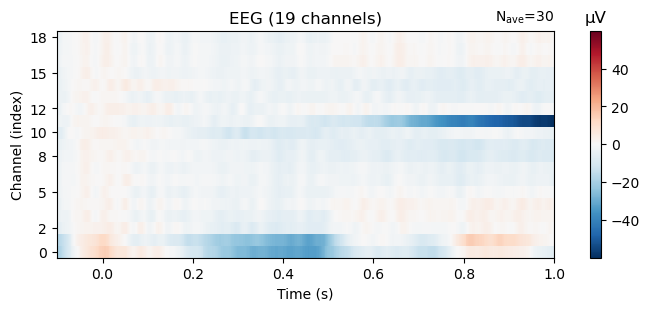

In [16]:
evoked_L4.plot_image(exclude=[], time_unit='s')#picks=['O1','O2']

In [14]:
"""    这个图很有用！  """
evoked_L5.plot_joint()
_=evoked_L5.plot_topomap(times=[0., 0.08, 0.12, 0.2, 0.3], ch_type='eeg')

No projector specified for this dataset. Please consider the method self.add_proj.


In [67]:
                """                                    01 SCI 各事件 诱发 出图                             """
import matplotlib.pyplot as plt
import mne

# 选择感兴趣的通道
channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

# 提取和平均化各个事件
evoked_L1 = epochs['L1'].copy().pick_channels(channels_of_interest).average()
evoked_L2 = epochs['L2'].copy().pick_channels(channels_of_interest).average()
evoked_L3 = epochs['L3'].copy().pick_channels(channels_of_interest).average()
evoked_L4 = epochs['L4'].copy().pick_channels(channels_of_interest).average()
evoked_L5 = epochs['L5'].copy().pick_channels(channels_of_interest).average()

# 创建一个新图表
fig, ax = plt.subplots(figsize=(10, 6))

# 设置颜色和线型
colors = dict(GVI_L1="red", GVI_L2="orange", GVI_L3="aqua", GVI_L4="lime", GVI_L5="green")
linestyles = dict(GVI_L1='-', GVI_L2='-', GVI_L3='-', GVI_L4='-', GVI_L5='-')

# 绘制 evoked 响应并进行美化
mne.viz.plot_compare_evokeds(dict(GVI_L1=evoked_L1, GVI_L2=evoked_L2, GVI_L3=evoked_L3, GVI_L4=evoked_L4, GVI_L5=evoked_L5),
                             combine='mean', colors=colors, linestyles=linestyles, show_sensors='upper right', axes=ax, 
                             title='Comparison of Evoked Responses', show=False)

# 美化图例
legend = ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., frameon=False, fontsize='large', 
                   title='Conditions', title_fontsize='large')

# 设置字体
plt.rcParams.update({'font.size': 12, 'font.family': 'Times New Roman'})

# 设置轴标签
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Amplitude (µV)', fontsize=14)

# 设置标题
ax.set_title('Comparison of Evoked Responses Across Conditions', fontsize=16, fontweight='bold')

# 去除网格线
ax.grid(False)

# 调整图表边距
plt.subplots_adjust(right=0.8)

# 显示图形
plt.show()
colors = dict(GVI_L1="#C9DCC4", GVI_L2="#D9B9D4", GVI_L3="#C5DFF4", GVI_L4="#F4EEAC", GVI_L5="#92A5D1")

In [77]:
                                    """ SCI 刺激事件波形相互对比图（带阴影） """
# ''' 设置evoked 类别颜色      T1事件 线条颜色为：Crimson     T2事件 线条颜色为：CornFlowerBlue   '''
channels_of_interest = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
colors = dict(L1= "Black",L2="Crimson", L5="CornFlowerBlue")
# ''' 设置evoked 绘制 线型，T1事件  线型为：-  T2事件  线型为：-- '''
linestyles = dict(L1='--',L2='--')

evokeds = dict(L1=list(epochs['L1'].iter_evoked()),
               L2=list(epochs['L2'].iter_evoked()),
               L5=list(epochs['L5'].iter_evoked()))
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['O1',colors=colors,linestyles=linestyles, split_legend=True) 

[<Figure size 800x600 with 1 Axes>]

In [1]:
                                     """               01 SCI 各事件 诱发 出图    (ERP成分区间阴影)                  """

"""  第四步：不同时间的     epochs  """
(events,event_id) = mne.events_from_annotations(raw, event_id=event_id)
# 创建epochs
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1.5, event_repeated='merge', baseline=(None, 0), preload=True)
epochs.plot()

# 选择感兴趣的通道
channels_of_interest = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

# 提取和平均化各个事件
evoked_Grey = epochs['Grey'].copy().pick_channels(channels_of_interest).average()
evoked_L1 = epochs['L1'].copy().pick_channels(channels_of_interest).average()
evoked_L2 = epochs['L2'].copy().pick_channels(channels_of_interest).average()
evoked_L3 = epochs['L3'].copy().pick_channels(channels_of_interest).average()
evoked_L4 = epochs['L4'].copy().pick_channels(channels_of_interest).average()
evoked_L5 = epochs['L5'].copy().pick_channels(channels_of_interest).average()

# 设置颜色和线型
colors = dict(GVI_L1="red", GVI_L2="orange", GVI_L3="blue", GVI_L4="lime", GVI_L5="green", GVI_Grey="purple")
linestyles = dict(GVI_L1='--', GVI_L2='--', GVI_L3='--', GVI_L4='--', GVI_L5='--', GVI_Grey='-')

# 创建一个新图表
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制 evoked 响应并进行美化
evokeds = dict(GVI_L1=evoked_L1, GVI_L2=evoked_L2, GVI_L3=evoked_L3, GVI_L4=evoked_L4, GVI_L5=evoked_L5, GVI_Grey=evoked_Grey)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', colors=colors, linestyles=linestyles, show_sensors='upper right', split_legend=True,  ci=0.95,axes=ax, show=False)
# 获取图中的线条并设置线条宽度
for line in ax.get_lines():
    line.set_linewidth(1.6)

# 添加阴影覆盖，不同颜色区分
ax.axvspan(0.1, 0.19, color='#C9DCC4', alpha=0.3)
ax.axvspan(0.2, 0.29, color='#D9B9D4', alpha=0.3)
ax.axvspan(0.3, 0.39, color='#C5DFF4', alpha=0.3)
ax.axvspan(0.6, 0.8, color='#92A5D1', alpha=0.3)

# 获取当前y轴的最大值
y_max = ax.get_ylim()[1]

# 在顶部添加加粗标签文字，使用动态位置
ax.text(0.145, y_max * 0.95, 'P100', fontsize=16, fontfamily='Times New Roman', fontweight='bold', ha='center', va='center')
ax.text(0.245, y_max * 0.95, 'N200', fontsize=16, fontfamily='Times New Roman', fontweight='bold', ha='center', va='center')
ax.text(0.345, y_max * 0.95, 'EPN', fontsize=16, fontfamily='Times New Roman', fontweight='bold', ha='center', va='center')
ax.text(0.7, y_max * 0.95, 'LPP', fontsize=16, fontfamily='Times New Roman', fontweight='bold', ha='center', va='center')

# 美化图例
legend = ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., frameon=False, fontsize='large',
                   title='Legend', title_fontsize='large')

# 设置字体
plt.rcParams.update({'font.size': 12, 'font.family': 'Times New Roman'})

# 设置轴标签
ax.set_xlabel('Time (s)', fontsize=14, fontweight='bold')
ax.set_ylabel('Amplitude (µV)', fontsize=14, fontweight='bold')

# 去除网格线
ax.grid(False)

# 调整图表边距
plt.subplots_adjust(right=0.8)

# 添加外框
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# 使用紧凑布局
plt.tight_layout()

# 显示图形
plt.show()

NameError: name 'mne' is not defined

In [18]:
                        '''    2024 05 17 'α1, α2, β1, and β2 average power values by Channel     '''
# 设置频段
alpha1_band = (8, 9.9)
alpha2_band = (10, 12.9)
beta1_band = (13, 17.9)
beta2_band = (18, 30)

# 选择 EEG 通道
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False)

# 提取数据和采样频率
data = raw.get_data(picks=picks)
sfreq = raw.info['sfreq']

# 计算所有频段的功率谱密度（PSD）
psds, freqs = psd_array_welch(data, sfreq, fmin=min(alpha1_band[0], alpha2_band[0], beta1_band[0], beta2_band[0]), fmax=max(alpha1_band[1], alpha2_band[1], beta1_band[1], beta2_band[1]), n_fft=2048)

# 获取每个频段的索引
alpha1_idx = np.logical_and(freqs >= alpha1_band[0], freqs <= alpha1_band[1])
alpha2_idx = np.logical_and(freqs >= alpha2_band[0], freqs <= alpha2_band[1])
beta1_idx = np.logical_and(freqs >= beta1_band[0], freqs <= beta1_band[1])
beta2_idx = np.logical_and(freqs >= beta2_band[0], freqs <= beta2_band[1])

# 计算每个通道在各频段的平均功率
alpha1_power = psds[:, alpha1_idx].mean(axis=1)
alpha2_power = psds[:, alpha2_idx].mean(axis=1)
beta1_power = psds[:, beta1_idx].mean(axis=1)
beta2_power = psds[:, beta2_idx].mean(axis=1)

# 打印结果
for ch_name, alpha1_p, alpha2_p, beta1_p, beta2_p in zip(raw.ch_names, alpha1_power, alpha2_power, beta1_power, beta2_power):
    print(f'Channel {ch_name}: Alpha1 power = {alpha1_p:.2f}, Alpha2 power = {alpha2_p:.2f}, Beta1 power = {beta1_p:.2f}, Beta2 power = {beta2_p:.2f}')

# 可视化结果
fig, ax = plt.subplots()
x = np.arange(len(raw.ch_names))
width = 0.2  # 条形图的宽度

# 绘制各频段功率条形图
rects1 = ax.bar(x - 1.5*width, alpha1_power, width, label='α1 (8-9.9 Hz)')
rects2 = ax.bar(x - 0.5*width, alpha2_power, width, label='α2 (10-12.9 Hz)')
rects3 = ax.bar(x + 0.5*width, beta1_power, width, label='β1 (13-17.9 Hz)')
rects4 = ax.bar(x + 1.5*width, beta2_power, width, label='β2 (18-30 Hz)')

# 添加一些文本标签
ax.set_ylabel('Power')
ax.set_title('α1, α2, β1, and β2 average power values by Channel')
ax.set_xticks(x)
ax.set_xticklabels(raw.ch_names, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

Effective window size : 4.096 (s)
Channel Fp1: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel Fp2: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel F3: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel F4: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel C3: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel C4: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel P3: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel P4: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel O1: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel O2: Alpha1 power = 0.00, Alpha2 power = 0.00, Beta1 power = 0.00, Beta2 power = 0.00
Channel F7: Alpha1 power = 0.00, A

In [19]:
                                      '''    各频段功率——通道——功率折线图变化     '''
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
from mne.time_frequency import psd_array_welch

# 设置事件和频段
alpha1_band = (8, 9.9)
alpha2_band = (10, 12.9)
beta1_band = (13, 17.9)
beta2_band = (18, 30)
bands = {'alpha1': alpha1_band, 'alpha2': alpha2_band, 'beta1': beta1_band, 'beta2': beta2_band}

# 选择感兴趣的通道
channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

#channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4',   'O1', 'O2', 'Cz']

# 定义一个函数来计算频段功率
def compute_band_power(data, sfreq, bands):
    band_powers = {band: [] for band in bands.keys()}
    
    for band, (fmin, fmax) in bands.items():
        psds, freqs = psd_array_welch(data, sfreq, fmin=fmin, fmax=fmax, n_fft=256, n_overlap=128)
        psds_mean = np.mean(psds, axis=2)  # 平均所有频率点的功率值
        band_powers[band] = np.mean(psds_mean, axis=0)  # 平均所有epochs的功率值
    
    return band_powers

# 提取每个事件的Epochs并计算功率
event_ids = ['L1', 'L2', 'L3', 'L4', 'L5']
band_powers_all = {event: {} for event in event_ids}

for event in event_ids:
    epochs_event = epochs[event].copy().pick_channels(channels_of_interest)
    data = epochs_event.get_data()
    sfreq = epochs_event.info['sfreq']
    band_powers_all[event] = compute_band_power(data, sfreq, bands)

# 将结果保存到CSV文件
results = []

for event, band_powers in band_powers_all.items():
    for band, powers in band_powers.items():
        for ch_idx, ch_name in enumerate(channels_of_interest):
            results.append({'Event': event, 'Band': band, 'Channel': ch_name, 'Power': powers[ch_idx]})

df = pd.DataFrame(results)
df.to_csv('band_powers.csv', index=False)

# 可视化结果
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, (band, (fmin, fmax)) in zip(axes.flatten(), bands.items()):
    for event in event_ids:
        band_powers = band_powers_all[event][band]
        ax.plot(channels_of_interest, band_powers, label=event)
    ax.set_title(f'{band} ({fmin}-{fmax} Hz) Band Power')
    ax.set_xlabel('Channels')
    ax.set_ylabel('Power')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size 

C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2685764822.py:37: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2685764822.py:37: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2685764822.py:37: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2685764822.py:37: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2685764822.py

Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


In [20]:
"""" 频段PSD功率分组柱状图 """
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
from mne.time_frequency import psd_array_welch
from scipy.stats import sem
import matplotlib.style as style

# 尝试导入SciencePlots库并使用其样式
try:
    import scienceplots
    style.use(['science', 'grid', 'no-latex'])
except ImportError:
    style.use('seaborn-deep')  # 如果无法使用SciencePlots，使用seaborn作为替代方案

# 定义频段范围
alpha1_band = (8, 9.9)
alpha2_band = (10, 12.9)
beta1_band = (13, 17.9)
beta2_band = (18, 30)
bands = {'alpha1': alpha1_band, 'alpha2': alpha2_band, 'beta1': beta1_band, 'beta2': beta2_band}

# 选择感兴趣的通道
channels_of_interest = ['Fp1', 'Fp2', 'F3', 'F4', 'P3', 'P4', 'O1', 'O2', 'T3', 'T4', 'Cz']

# 定义函数计算频段功率
def compute_band_power(data, sfreq, bands):
    band_powers = {band: [] for band in bands.keys()}
    
    for band, (fmin, fmax) in bands.items():
        psds, freqs = psd_array_welch(data, sfreq, fmin=fmin, fmax=fmax, n_fft=256, n_overlap=128)
        psds_mean = np.mean(psds, axis=2)  # 平均所有频率点的功率值
        band_powers[band] = np.mean(psds_mean, axis=0)  # 平均所有epochs的功率值
    
    return band_powers

# 计算每个事件在各频段上的平均功率
event_ids = ['L1', 'L2', 'L3', 'L4', 'L5']
band_powers_all = {event: {} for event in event_ids}

for event in event_ids:
    epochs_event = epochs[event].copy().pick_channels(channels_of_interest)
    data = epochs_event.get_data()
    sfreq = epochs_event.info['sfreq']
    band_powers_all[event] = compute_band_power(data, sfreq, bands)

# 可视化结果
plt.figure(figsize=(12, 8))
bar_width = 0.15
index = np.arange(len(bands))

# 调整颜色
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974']

for i, event in enumerate(event_ids):
    powers = [np.mean(band_powers_all[event][band]) for band in bands.keys()]
    errors = [sem(band_powers_all[event][band]) for band in bands.keys()]
    plt.bar(index + i * bar_width, powers, bar_width, label=event, color=colors[i], yerr=errors, capsize=5)

# 添加轴标签和标题
plt.xlabel('Frequency Bands', fontsize=14, fontweight='bold')
plt.ylabel('Average Power', fontsize=14, fontweight='bold')
plt.title('Average Power in Different Frequency Bands for Each Event', fontsize=16, fontweight='bold')

# 设置刻度标签字体大小
plt.xticks(index + bar_width * 2, bands.keys(), fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# 添加图例
plt.legend(fontsize=14, frameon=True)

# 设置网格样式
plt.grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('average_band_powers.png', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.512 (s)
Effective window size 

C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2517892181.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2517892181.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2517892181.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2517892181.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs_event.get_data()
C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2517892181.py

In [14]:
'**********************************************  事件功率谱对比  *****************************'
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_multitaper
 
mne.set_log_level(False)
# 设置分析频率的区间范围，这里有小数主要是为了和后面小波变换方法做对比（暂时未实现）。
# iter_freqs = [
#     {'name': 'Delta', 'fmin': 0, 'fmax': 3.75},
#     {'name': 'Theta', 'fmin': 3.75, 'fmax': 7.5},
#     {'name': 'Alpha', 'fmin': 7.5, 'fmax': 12.5},
#     {'name': 'Beta',  'fmin': 12.5, 'fmax': 35},
#     {'name': 'Gamma', 'fmin': 35, 'fmax': 100}
# ]
# iter_freqs = [
#     {'name': 'Alpha1', 'fmin': 8, 'fmax': 9.9},
#     {'name': 'Alpha2', 'fmin': 10, 'fmax': 12.9},
#     {'name': 'Beta1', 'fmin': 13, 'fmax': 17.9},
#     {'name': 'Beta2', 'fmin': 18, 'fmax': 29.9},
# ]
iter_freqs = [
    # {'name': 'Delta', 'fmin': 0, 'fmax': 3.75},
    {'name': 'Theta', 'fmin': 3.75, 'fmax': 7.5},
    {'name': 'Alpha', 'fmin': 7.5, 'fmax': 12.5},
    {'name': 'Beta',  'fmin': 12.5, 'fmax': 35},
]
# 设置不同事件对应的颜色
#color_events = {'Close': "black", 'Grey':"grey", 'L1': "orange", 'L2': "green",'L3': "blue", 'L4': "yellow",'L5':"brown"}
color_events = {'L1': "orange", 'L2': "green",'L3': "blue", 'L4': "yellow",'L5':"brown"}

#################psd计算频率区间的能量分布(单通道)############
def EpochPSDEnergy(epochs):
    # 遍历epochs中的不同事件
    for event in epochs.event_id:
        # 计算某个事件对应所有epochs的功率谱密度（返回为ndarray）
        psds, freqs = psd_multitaper(epochs[event], n_jobs=1)
        # 计算事件对应epochs的均值
        psds = np.squeeze(np.average(psds, axis=0))
        #初始化能量矩阵
        eventEnergy =[]
        # 遍历不同频率区间的能量和
        for iter_freq in iter_freqs:
            eventEnergy.append(np.sum(psds[(iter_freq['fmin'] < freqs) & (freqs < iter_freq['fmax'])]))
        # 绘制不同事件、不同频率区间的能量值
        plt.plot([xLabel['name'] for xLabel in iter_freqs], eventEnergy, color=color_events[event], label=event, marker='o', lw=0, ms=5)
    # 设置标题
    plt.title('PSD_SUM')
    # 设置图例
    plt.legend()
    # 绘图显示
    plt.show()

if __name__ == '__main__':
    # 读取筛选好的epoch数据
    #channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
    channels_of_interest =['O1']

    # 这里只分析一个通道的psd
   # epochs.pick(['Cz']).plot_psd()
    # 绘制不同区间的能量分布epochs['L1'].pick_channels(channels_of_interest).
    EpochPSDEnergy(epochs.pick_channels(channels_of_interest))
    #EpochPSDEnergy(epochs.pick_types(eeg=True))
     #EpochPSDEnergy(epochs.pick(['Fp1']))


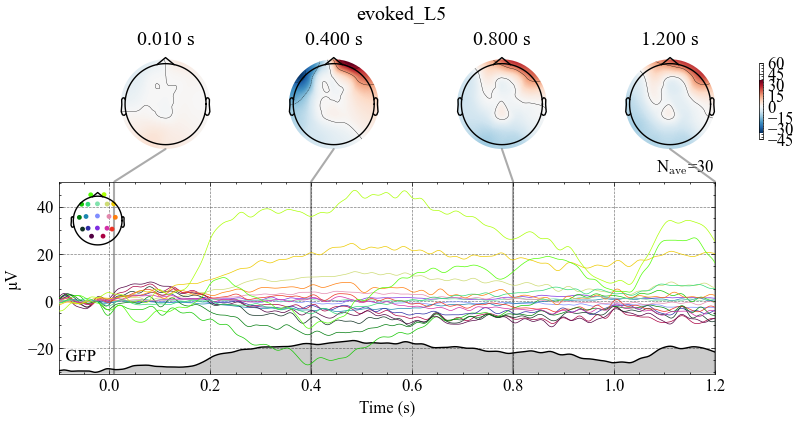

In [79]:
                '''    03 SCI 联合图 —— 事件相关点位——GFP全局功率谱图   '''
ts_args=dict(gfp=True,time_unit='s')
topomap_args=dict(sensors=False,time_unit='s')
evoked_L1.plot_joint(title='evoked_L1',times=[.01,0.4,0.8,1.2],
                       ts_args=ts_args,topomap_args=topomap_args)
evoked_L2.plot_joint(title='evoked_L2',times=[.01,0.4,0.8,1.2],
                       ts_args=ts_args,topomap_args=topomap_args)
evoked_L3.plot_joint(title='evoked_L3',times=[.01,0.4,0.8,1,1],
                       ts_args=ts_args,topomap_args=topomap_args)
evoked_L4.plot_joint(title='evoked_L4',times=[.01,0.4,1,1.2],
                       ts_args=ts_args,topomap_args=topomap_args)
evoked_L5.plot_joint(title='evoked_L5',times=[.01,0.4,0.8,1.2],
                       ts_args=ts_args,topomap_args=topomap_args)
#时间-空间图显示了在不同时间点（0.09秒和0.20秒）的全局场电位（GFP）的变化。它可以帮助您观察整体的脑电信号强度随时间的变化。
#头皮图显示了在指定时间点的电极级别的脑电信号分布。通过顶图，您可以看到脑电信号在头皮上的分布情况，以及不同电极上的信号强度。

In [80]:
"""对应通道 对应事件的 脑头皮地形图 ----  """
#[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
# 提取   Epochs 中的 Events    脑地形图——平均幅度
# L1 = epochs['Close'].copy().pick_channels(channels_of_interest).average()
# L1.plot()
# L2 = epochs['break'].copy().pick_channels(channels_of_interest).average()
evoked_L1.plot_topomap(title='L1 Topomap')
evoked_L2.plot_topomap(title='L2 Topomap')
#raw.plot_psd(area_mode='range', tmax=10.0, average=False)

TypeError: Evoked.plot_topomap() got an unexpected keyword argument 'title'

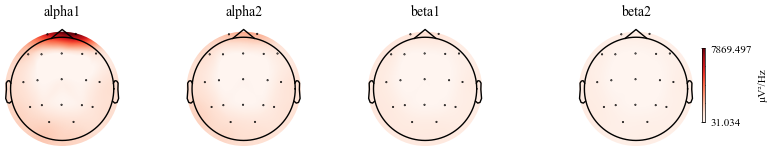

In [85]:
"""            不同波段的脑头皮功率谱地形图                 """
channels_of_interest =['Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

alpha1_band = (8, 9.9)
alpha2_band = (10, 12.9)
beta1_band = (13, 17.9)
beta2_band = (18, 30)
bands = {'alpha1': alpha1_band, 'alpha2': alpha2_band, 'beta1': beta1_band, 'beta2': beta2_band}

#bands = {'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30)}

#bands = [(1, 4, 'Delta (1-4 Hz)'), (4, 8, 'Theta (4-8 Hz)'), 
        # (8, 12, 'Alpha (8-12 Hz)'), (12, 30, 'Beta (12-30 Hz)'), (30, 45, 'Gamma (30-45 Hz)')]

#epochs['L2'].plot_psd_topomap(bands=bands, vlim='joint')
epochs['L1'].copy().pick_channels(channels_of_interest).plot_psd_topomap(bands=bands, vlim='joint')
epochs['L2'].copy().pick_channels(channels_of_interest).plot_psd_topomap(bands=bands, vlim='joint')
epochs['L3'].copy().pick_channels(channels_of_interest).plot_psd_topomap(bands=bands, vlim='joint')
epochs['L4'].copy().pick_channels(channels_of_interest).plot_psd_topomap(bands=bands, vlim='joint')
epochs['L5'].copy().pick_channels(channels_of_interest).plot_psd_topomap(bands=bands, vlim='joint')


In [86]:
"""                          *** SCI 图1 ***  ————————————————     ERP波形图（不同色块填充）   (有问题) """
channels_of_interest = ['O1', 'O2']
# 创建一个新的图表
fig, ax = plt.subplots()
# 获取ERP波形的时间轴和数据
L1 = epochs['L1'].copy().pick_channels(channels_of_interest).average()
L2 = epochs['L2'].copy().pick_channels(channels_of_interest).average()
L3 = epochs['L3'].copy().pick_channels(channels_of_interest).average()
L4 = epochs['L4'].copy().pick_channels(channels_of_interest).average()
L5 = epochs['L5'].copy().pick_channels(channels_of_interest).average()

times = L5.times
data = L5.data[0]

# 绘制ERP波形
ax.plot(times, data, color='black', label='ERP WaveForm')

# 添加不同颜色的背景区域
ax.fill_between(times, data, where=(times >= 0.1) & (times <= 0.2), color='green', alpha=0.3, label='P&N1')
ax.fill_between(times, data, where=(times >= 0.25) & (times <= 0.37), color='blue', alpha=0.3, label='P&N2')
ax.fill_between(times, data, where=(times >= 0.38) & (times <= 0.470), color='Orange', alpha=0.3, label='P&N3')
ax.fill_between(times, data, where=(times >= 0.48) & (times <= 0.57), color='Red', alpha=0.3, label='P&N4')
ax.fill_between(times, data, where=(times >= 0.58) & (times <= 0.8), color='yellow', alpha=0.3, label='LPP')

# 添加y=0位置的虚线
ax.axhline(y=0, color='black', linestyle='--', label='baseline')

# 添加图例
ax.legend()

# 显示图表
plt.show()

In [26]:
import pywt

# 需要分析的四个频段
iter_freqs = [
    {'name': 'Delta', 'fmin': 0, 'fmax': 4},
    {'name': 'Theta', 'fmin': 4, 'fmax': 8},
    {'name': 'Alpha', 'fmin': 8, 'fmax': 13},
    {'name': 'Beta', 'fmin': 13, 'fmax': 35},
    {'name': 'Gramma', 'fmin': 36, 'fmax': 50},
]
 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
mne.set_log_level(False)
#############################################小波包计算四个频段的能量分布
def WPEnergy(data, fs, wavelet, maxlevel=6):
    # 小波包分解
    wp = pywt.WaveletPacket(data=data, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    # 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
    freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
    # 计算maxlevel最小频段的带宽
    freqBand = fs / (2 ** maxlevel)
    # 定义能量数组
    energy = []
    # 循环遍历计算四个频段对应的能量
    for iter in range(len(iter_freqs)):
        iterEnergy = 0.0
        for i in range(len(freqTree)):
            # 第i个频段的最小频率
            bandMin = i * freqBand
            # 第i个频段的最大频率
            bandMax = bandMin + freqBand
            # 判断第i个频段是否在要分析的范围内
            if (iter_freqs[iter]['fmin'] <= bandMin and iter_freqs[iter]['fmax'] >= bandMax):
                # 计算对应频段的累加和
                iterEnergy += pow(np.linalg.norm(wp[freqTree[i]].data, ord=None), 2)
        # 保存四个频段对应的能量和
        energy.append(iterEnergy)
    # 绘制能量分布图
    plt.plot([xLabel['name'] for xLabel in iter_freqs], energy, lw=0, marker='o')
    plt.title('EEG当前频段能量分布图')
    plt.show()
 
 
if __name__ == '__main__':
    # 读取筛选好的epoch数据
   # epochsCom = mne.read_epochs(r'F:\BaiduNetdiskDownload\BCICompetition\BCICIV_2a_gdf\Train\Fif\A02T_epo.fif')
 
    dataCom = epochs[10].get_data()[0][0]
    WPEnergy(dataCom, fs=250, wavelet='db4', maxlevel=6)

C:\Users\许愿\AppData\Local\Temp\ipykernel_27384\2252044028.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  dataCom = epochs[10].get_data()[0][0]
D:\Anaconda\envs\mne\Lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from current font.
  el.exec() if hasattr(el, "exec") else el.exec_()
D:\Anaconda\envs\mne\Lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  el.exec() if hasattr(el, "exec") else el.exec_()
D:\Anaconda\envs\mne\Lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  el.exec() if hasattr(el, "exec") else el.exec_()
D:\Anaconda\envs\mne\Lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current

In [1]:
# """ #trial序列图 """

channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
plt.show()
epochs.plot_image(1,                                     #根据通道选择对应的能量图
                  cmap='interactive',
                  sigma=1., 
                  vmin=-250, vmax=250
                  )
""" #ERP混合图（erp曲线和所有trial erp的色彩图）"""
epochs['L1'].plot_image(picks=channels_of_interest, combine='mean')
epochs['L2'].plot_image(picks=channels_of_interest, combine='mean')

""" erp对比曲线图 """
#channels_of_interest = ['O1','O2']
# channels_of_interest =[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
# evokeds = dict(L1=list(epochs['L1'].iter_evoked()),
#                L2=list(epochs['L2'].iter_evoked()),
#                L3=list(epochs['L3'].iter_evoked()),
#                L4=list(epochs['L4'].iter_evoked()),
#                L5=list(epochs['L5'].iter_evoked()),   
#               )
# #mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Cz', 'C1','C2'])
# # 调用mne.viz.plot_compare_evokeds生成图
# fig, ax = plt.subplots()
# mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=channels_of_interest, ci=None,show_sensors='upper right', axes=ax)#invert_y=True
# # 将标题移动到图的中央
# #ax.set_title('CZ', loc='right', fontsize=14, fontfamily='Arial')
# #在图上添加阴影覆盖
# ax.axvspan(0.08, 0.18, color='grey', alpha=0.1, label='P100')
# ax.axvspan(0.19, 0.245, color='grey', alpha=0.1, label='N200')
# ax.axvspan(0.25, 0.35, color='grey', alpha=0.1, label='P300')
# ax.axvspan(0.45, 0.65, color='grey', alpha=0.1, label='LPP')
# # 在阴影上方添加文字
# ax.text(0.128, 11.5, 'P100', fontsize=16, fontfamily='Arial')
# ax.text(0.192, 11.5, 'N200', fontsize=16, fontfamily='Arial')
# ax.text(0.28,  11.5, 'P300', fontsize=16, fontfamily='Arial')
# ax.text(0.53,  11.5, 'LPP', fontsize=16, fontfamily='Arial')
# #ax.text(0.5, 0.5, 'Hello, World!', fontsize=12, fontfamily='Arial')
# # 创建图例，并设置图例的标题
# legend = ax.legend(loc='upper right', bbox_to_anchor=(0.82, 0.99),prop={'family': 'Times New Roman'})
# # 设置图例的尺寸
# legend.get_frame().set_linewidth(1.5)  # 设置图例边框线的宽度
# # legend.get_frame().set_edgecolor('black')  # 设置图例边框线的颜色
# legend.get_title().set_fontsize(14)  # 设置图例标题的字体大小
# # 设置图例中标签的字体大小
# for text in legend.get_texts():
#     text.set_fontsize(12)  # 设置图例标签的字体大小
# # 显示图表
# plt.show()

""" 电极位置图 """
# epochs.plot_sensors(ch_type='eeg',show_names='True')
# plt.show()
""" psd图 """
# epochs['L1'].copy().pick_channels(channels_of_interest).plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# epochs['L2'].copy().pick_channels(channels_of_interest).plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# epochs['L3'].copy().pick_channels(channels_of_interest).plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# epochs['L4'].copy().pick_channels(channels_of_interest).plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# epochs['L5'].copy().pick_channels(channels_of_interest).plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# plt.show()
# epochs.pick(['Cz']).plot_psd()   
# epochs_custom['T1'].plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# plt.show()
# epochs_custom['T2'].plot_psd(fmin=2., fmax=50., average=True, spatial_colors=False)
# plt.show()
# """psd头皮图（分频段）"""
# times=0.3
# epochs['L1'].plot_psd_topomap(ch_type='eeg', normalize=True)

# epochs['L2'].plot_psd_topomap(ch_type='eeg', normalize=True)

# epochs['L3'].plot_psd_topomap(ch_type='eeg', normalize=True)

# epochs['L4'].plot_psd_topomap(ch_type='eeg', normalize=True)

# epochs['L5'].plot_psd_topomap(ch_type='eeg', normalize=True)

# epochs['Open'].plot_psd_topomap(ch_type='eeg', normalize=True)
# plt.show()


NameError: name 'plt' is not defined

In [ ]:
"""                step8 提取数据                """
 
# # get_data()的使用
# epochs_array = epochs.get_data()  # 以epoch为例
# print(epochs_array.shape)  # 查看获取的数据
# print(epochs_array) 
 
# .data的使用
power_array = power.data
print(power_array.shape)
print(power_array)